In [1]:
#Import corresponding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import dataset 1
acc = pd.read_csv('Accident_Information.csv')

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Import dataset 2
pssn= pd.read_csv('Vehicle_Information.csv')

In [4]:
#Merge datasets
new = pd.merge(acc,pssn,how='inner',on='Accident_Index')

In [5]:
#Focus on Scotland accidents
Scot=new[new['InScotland'] == 'No'].index
new.drop(Scot, inplace= True)

In [7]:
#Assign numerical values to Accidents Severity
new['seve'] = np.where(new['Accident_Severity']== 'Slight', 1,np.where(new['Accident_Severity']== 'Serious',0.5,0))
#Define new variable SVTY
new['SVTY'] = (new['seve']*0.23)*( new['Number_of_Casualties']*0.77) 

AttributeError: 'AxesSubplot' object has no attribute 'reindex'

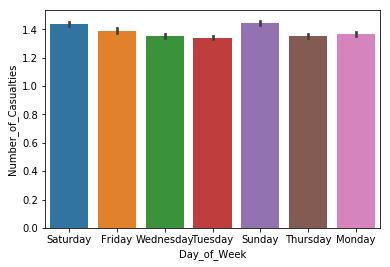

In [8]:
#Observe casualties by day
new.index = pd.CategoricalIndex(new.index, categories= ["Monday", "Tuesday", "Wednesday",'Thursday','Friday','Saturday','Sunday'])
new.sort_index(level=0, inplace=True)
bars=sns.barplot(x='Day_of_Week',y='Number_of_Casualties',data=new)
a = ["Monday", "Tuesday", "Wednesday",'Thursday','Friday','Saturday','Sunday']
plot1 = bars.reindex(index='a')
plt.show()

Day_of_Week                     Monday   Tuesday  Wednesday  Thursday  \
Age_Band_of_Driver                                                      
0-5                                NaN       NaN        NaN       NaN   
6-10                               NaN       NaN        NaN       NaN   
11 - 15                       0.807692  0.750000   0.944444  0.891304   
16 - 20                       0.899639  0.914809   0.919847  0.899729   
21 - 25                       0.904431  0.918506   0.922046  0.908028   
26 - 35                       0.916860  0.918121   0.916830  0.909830   
36 - 45                       0.909617  0.914851   0.906963  0.912829   
46 - 55                       0.903511  0.907188   0.904736  0.903472   
56 - 65                       0.896857  0.901286   0.901758  0.884839   
66 - 75                       0.889764  0.889068   0.879761  0.873932   
Over 75                       0.880694  0.869801   0.858925  0.852174   
Data missing or out of range  0.948071  0.941892   

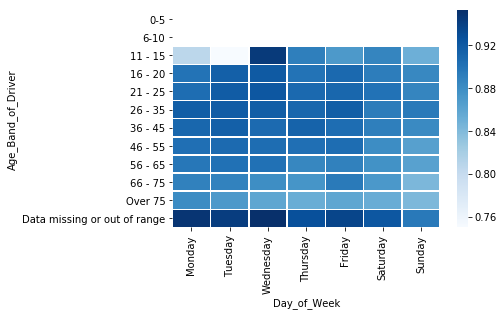

In [9]:
#Involvement of drivers by age band and day
pt1=new.pivot_table(values='seve',index='Age_Band_of_Driver',columns='Day_of_Week')
a = ["Monday", "Tuesday", "Wednesday",'Thursday','Friday','Saturday','Sunday']
b=['0-5','6-10','11 - 15','16 - 20','21 - 25','26 - 35','36 - 45','46 - 55','56 - 65','66 - 75','Over 75','Data missing or out of range']
pt1 = pt1.reindex(index=b, columns = a)
sns.heatmap(pt1,cmap='Blues',linecolor='white',linewidths=0.5)
print(pt1)

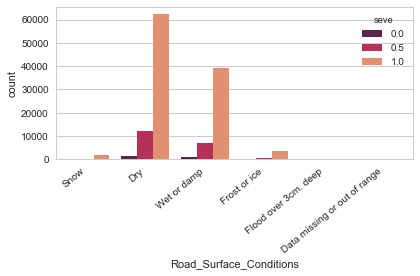

In [18]:
#Observe whether road conditions affect accidents severity
ch2=sns.countplot('Road_Surface_Conditions',hue='seve', data=new,palette='rocket')
ch2.set_xticklabels(ch2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Day_of_Week            Monday   Tuesday  Wednesday  Thursday    Friday  \
Urban_or_Rural_Area                                                      
Rural                0.872794  0.880935   0.877093  0.867694  0.868028   
Unallocated          1.000000  1.000000   0.777778  1.000000  0.800000   
Urban                0.933871  0.933286   0.933694  0.929690  0.934034   

Day_of_Week          Saturday    Sunday  
Urban_or_Rural_Area                      
Rural                0.844963  0.836834  
Unallocated          0.833333  0.833333  
Urban                0.924618  0.918519  


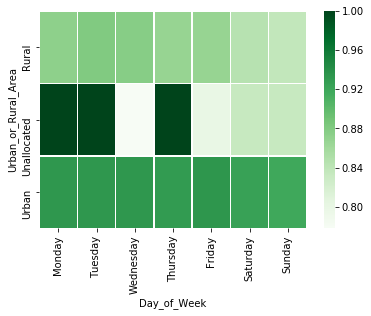

In [11]:
#Observe tendencies in Urban or Rural locations
pt2=new.pivot_table(values='seve',index='Urban_or_Rural_Area',columns='Day_of_Week')
a = ["Monday", "Tuesday", "Wednesday",'Thursday','Friday','Saturday','Sunday']
b=['0-5','6-10','11 - 15','16 - 20','21 - 25','26 - 35','36 - 45','46 - 55','56 - 65','66 - 75','Over 75','Data missing or out of range']
pt2 = pt2.reindex(columns = a)
sns.heatmap(pt2,cmap='Greens',linecolor='white',linewidths=0.5)
print(pt2)

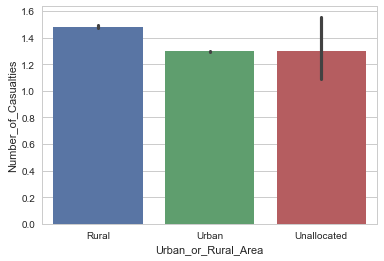

In [20]:
sns.barplot(x='Urban_or_Rural_Area',y='Number_of_Casualties',data=new)

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


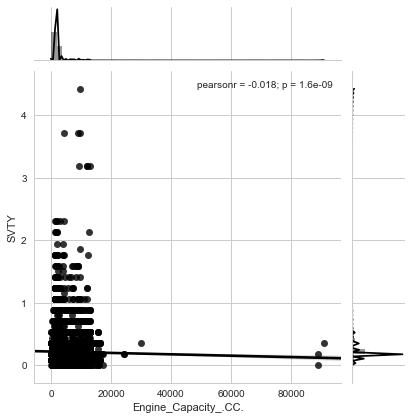

In [19]:
#plotting of engine capacity vs casualties
sns.jointplot(x='Engine_Capacity_.CC.',y='SVTY',data=new,kind='regression',color ='k')

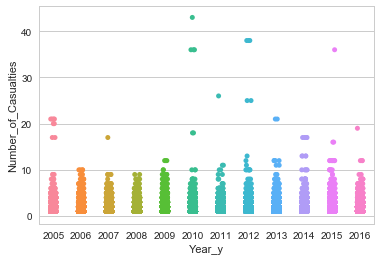

In [21]:
#Number of Casualties by year
sns.stripplot(x='Year_y',y='Number_of_Casualties',data=new,jitter=True)

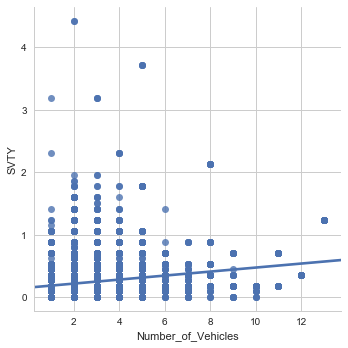

In [22]:
#Regression plot of SVTY & number of cars
sns.lmplot(x='Number_of_Vehicles',y='SVTY',data=new)

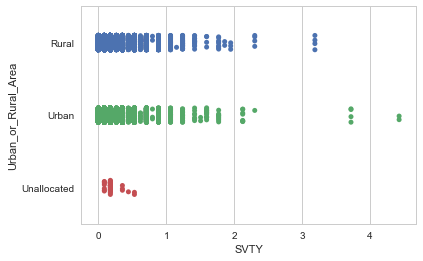

In [23]:
sns.stripplot(x='SVTY',y='Urban_or_Rural_Area',data=new,jitter=True)

In [17]:
 sns.set(style='whitegrid')

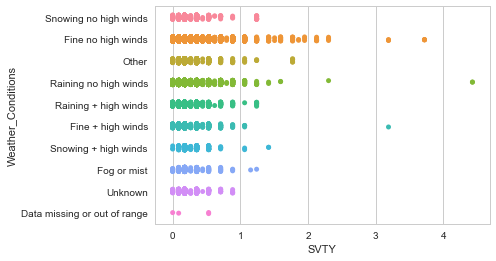

In [24]:
sns.stripplot(x='SVTY',y='Weather_Conditions',data=new,jitter=True)